In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime, timedelta

In [2]:
df_iskvietimai = pd.read_json(r"C:\Users\pauli\Downloads\prir_2019_03_31.json")

failai=[]
for name in glob.glob(r'C:\Users\pauli\Downloads\iskvietimai\*.json'):
    failai.append(name)
    
for i in failai:
    df_iskvietimai = pd.concat([df_iskvietimai, pd.read_json(i)])

In [3]:
df_iskvietimai.head(2)

,id,infoGavimoLaikas,registravimoData,ivykioData,ivykioDataIki,kategorija,pranesimoFormaKt,createDate,lastChangeDate,teisesPazeidimoPozymis,...,pranesejoStatusas,arDalyvaujaNepilnameciai,vieta,vieta2,valstybe,vietove,savivaldybe,seniunija,gatve,kertantiGatve
0,16337964,2019-01-01 00:00,2019-01-01 00:00,2019-01-01 00:00,None,C,BPCIS,2019-01-01 00:00,2019-01-04 16:02,Kita,...,privatus fizinis asmuo,NaN,kita,None,Lietuva,Tryškių mstl.,Telšių rajono sav.,Tryškių sen.,Žemaitės,None
1,16337965,2019-01-01 00:00,2019-01-01 00:00,2019-01-01 00:00,None,C,BPCIS,2019-01-01 00:00,2019-01-02 09:54,Kita,...,privatus fizinis asmuo,0.0,kita,None,Lietuva,Vilkaviškis,Vilkaviškio rajono sav.,Vilkaviškis,Žalumynų,None


In [4]:
df_ivykis = pd.read_csv(r"C:\Users\pauli\Downloads\Ivykis.csv", low_memory=False)

In [8]:
df_ivykis.head(2)

,_type,_id,_revision,_page.next,korteles_id,susieta_su_kortele,korteles_data,ivykio_aprasymas_lt,administracinis_vienetas,pagd_padalinys,...,iskvietimo_laikas,likvidavimo_laikas,ivykio_medziaga,ivykio_priezastis,isgelbeta_zmoniu,zuvo_zmoniu,zuvo_nepilnameciu,traumuota_zmoniu,sunaikinta_statiniu,ivykio_svarba
0,datasets/gov/pagd/ivykiu_suvestine/Ivykis,91a340a1-720c-4bbe-a4bf-3c4b57f3d605,ecfe67b8-09f8-430e-b717-f2bd0f7875ac,NaN,00000046081b1e4,NaN,2017-04-22,Cenzūruota,Utenos r. sav.,Utenos r. sav.,...,2017-04-22T17:17:00,NaN,NaN,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0
1,datasets/gov/pagd/ivykiu_suvestine/Ivykis,c2dcca1f-24fe-4a07-8263-fd2acfc37ba8,2345639d-0392-43c1-adff-2bdc3d0f9e8e,NaN,000007412530a4b,NaN,2004-07-31,Cenzūruota,Mažeikių r. sav.,Mažeikių r. sav.,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0


In [9]:
df_orai = pd.read_csv(r"C:\Users\pauli\Downloads\orai2014.csv")

failai=[]
for name in glob.glob(r'C:\Users\pauli\Downloads\orai\*.csv'):
    failai.append(name)
    
for i in failai:
    df_orai = pd.concat([df_orai, pd.read_csv(i)])

In [10]:
df_menulis = pd.read_csv(r"C:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas\menulis.csv", low_memory=False)

In [11]:
df_iskvietimai.drop(columns=['id', 'ivykioDataIki', 'policijosIstaigaL2', 'kertantiGatve', 'gatve', 'seniunija',
                           'arDalyvaujaNepilnameciai', 'policijosKomisariatas', 'policijosIstaigaL2'], inplace= True)

df_ivykis.drop(columns=['_type', '_id', '_revision', '_page.next', 'korteles_id', 'susieta_su_kortele',
                           'ivykio_aprasymas_lt', 'darbu_atlikimo_rajonas'], inplace= True)

In [12]:
df_menulis['data'] = pd.to_datetime(df_menulis['data'], errors='coerce')

df_orai['obs_time_utc'] = pd.to_datetime(df_orai['obs_time_utc'], errors='coerce')
df_orai['data'] = df_orai['obs_time_utc'].dt.date
df_orai['data'] = pd.to_datetime(df_orai['data'], errors='coerce')

df_orai= df_orai.groupby('data')['air_temperature'].mean().reset_index()

In [24]:
df_ivykis['korteles_data'] = pd.to_datetime(df_ivykis['korteles_data'], errors='coerce')
df_menulis['data'] = pd.to_datetime(df_menulis['data'], errors='coerce')

In [22]:
df_iskvietimai['registravimoData'] = pd.to_datetime(df_iskvietimai['registravimoData'], errors='coerce')
df_iskvietimai['registravimoData'] = df_iskvietimai['registravimoData'].dt.date
df_iskvietimai['registravimoData'] = pd.to_datetime(df_iskvietimai['registravimoData'], errors='coerce')

In [32]:
df_iskvietimai = df_iskvietimai.merge(df_orai, how='left', left_on='registravimoData', right_on='data')
df_iskvietimai = df_iskvietimai.merge(df_menulis, how='left', left_on='registravimoData', right_on='data')
df_ivykis = df_ivykis.merge(df_orai, how='left', left_on='korteles_data', right_on='data')
df_ivykis = df_ivykis.merge(df_menulis, how='left', left_on='korteles_data', right_on='data')

In [44]:
df_ivykis.head(2)

,korteles_data,administracinis_vienetas,pagd_padalinys,vietoves_tipas,ivykio_vieta,ivykio_vietos_aukstas,iskvietimo_laikas,likvidavimo_laikas,ivykio_medziaga,ivykio_priezastis,isgelbeta_zmoniu,zuvo_zmoniu,zuvo_nepilnameciu,traumuota_zmoniu,sunaikinta_statiniu,ivykio_svarba,data_x,air_temperature,data_y,menulis
0,2017-04-22,Utenos r. sav.,Utenos r. sav.,Miestelis,NaN,NaN,2017-04-22T17:17:00,NaN,NaN,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0,2017-04-22,5.0,2017-04-22,Delčia
1,2004-07-31,Mažeikių r. sav.,Mažeikių r. sav.,Miestas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,2004-07-31,Pilnatis


In [43]:
df_iskvietimai['air_temperature'] = df_iskvietimai['air_temperature'].round(0)

df_ivykis['air_temperature'] = df_ivykis['air_temperature'].round(0)

In [37]:
df_oru_daznis = df_iskvietimai.drop_duplicates(subset='registravimoData', keep='first')
df_oru_daznis= df_oru_daznis.groupby('air_temperature')['lastChangeDate'].count().reset_index()

In [45]:
df_oru_daznis2 = df_ivykis.drop_duplicates(subset='korteles_data', keep='first')
df_oru_daznis2= df_oru_daznis2.groupby('air_temperature')['pagd_padalinys'].count().reset_index()

In [40]:
df_data=df_iskvietimai.groupby('air_temperature')['lastChangeDate'].count().reset_index()

df_data = df_data.sort_values('air_temperature')
df_data['lastChangeDate'] = df_data['lastChangeDate'] / df_oru_daznis['lastChangeDate']

df_data['lastChangeDate'] = df_data['lastChangeDate'].astype(int)

df_data['air_temperature'] = df_data['air_temperature'].astype(int)

In [47]:
df_data22=df_ivykis.groupby('air_temperature')['pagd_padalinys'].count().reset_index()

df_data22 = df_data22.sort_values('air_temperature')
df_data22['pagd_padalinys'] = df_data22['pagd_padalinys'] / df_oru_daznis2['pagd_padalinys']

df_data22['pagd_padalinys'] = df_data22['pagd_padalinys'].astype(int)

df_data22['air_temperature'] = df_data22['air_temperature'].astype(int)

In [48]:
df_data22.head(3)

,air_temperature,pagd_padalinys
0,-20,124
1,-19,112
2,-18,113


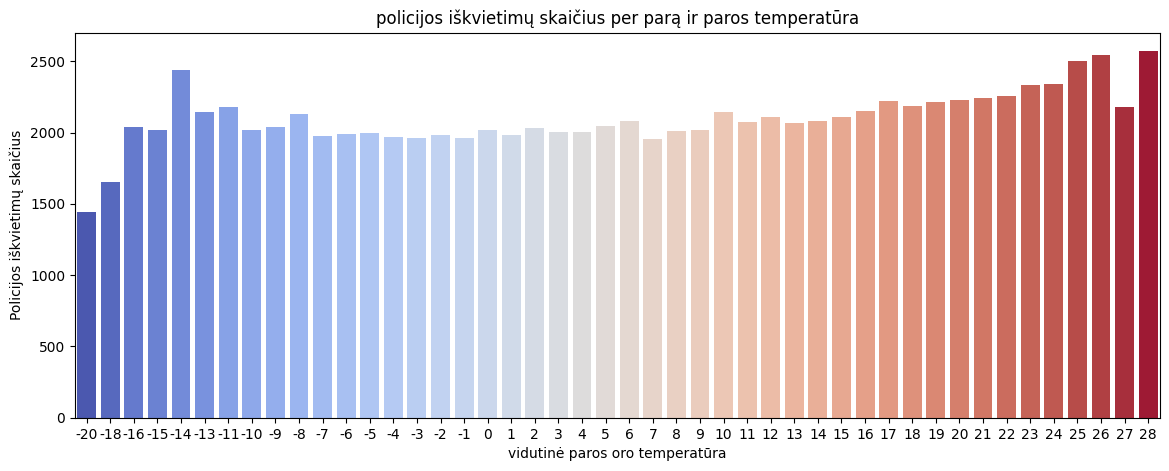

In [52]:
plt.figure(figsize=(14, 5))

norm = plt.Normalize(df_data['air_temperature'].min(), df_data['air_temperature'].max())
colors = [plt.cm.coolwarm(norm(val)) for val in df_data['air_temperature']]

sns.barplot(x='air_temperature', y='lastChangeDate', data=df_data, hue='air_temperature', palette=colors, dodge=False, legend=False)

plt.xlabel('vidutinė paros oro temperatūra')
plt.ylabel('Policijos iškvietimų skaičius') 
plt.title('policijos iškvietimų skaičius per parą ir paros temperatūra')
plt.show()

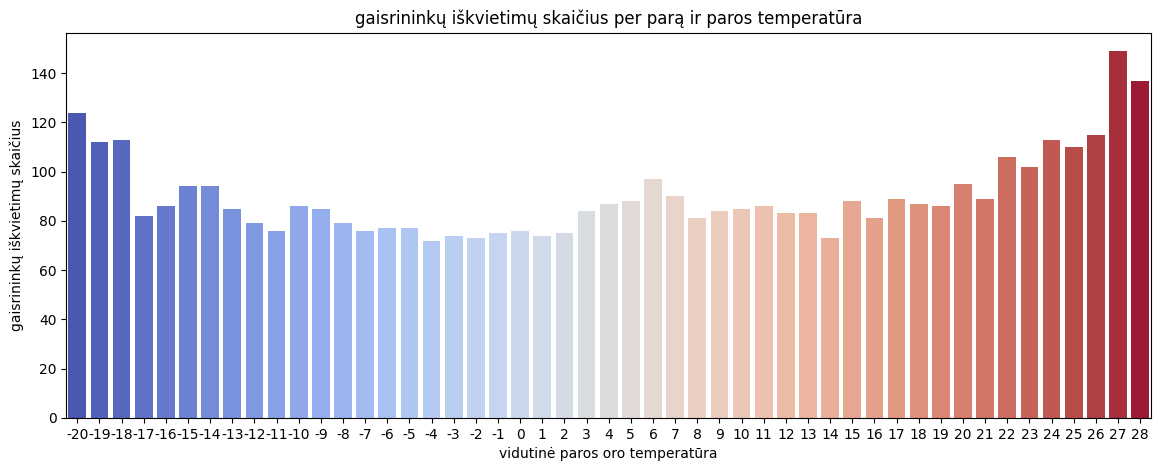

In [53]:
plt.figure(figsize=(14, 5))

norm = plt.Normalize(df_data22['air_temperature'].min(), df_data22['air_temperature'].max())
colors = [plt.cm.coolwarm(norm(val)) for val in df_data22['air_temperature']]

sns.barplot(x='air_temperature', y='pagd_padalinys', data=df_data22, hue='air_temperature', palette=colors, dodge=False, legend=False)

plt.xlabel('vidutinė paros oro temperatūra')
plt.ylabel('gaisrininkų iškvietimų skaičius') 
plt.title('gaisrininkų iškvietimų skaičius per parą ir paros temperatūra')
plt.show()

In [55]:
df_ivykis.head(2)

,korteles_data,administracinis_vienetas,pagd_padalinys,vietoves_tipas,ivykio_vieta,ivykio_vietos_aukstas,iskvietimo_laikas,likvidavimo_laikas,ivykio_medziaga,ivykio_priezastis,isgelbeta_zmoniu,zuvo_zmoniu,zuvo_nepilnameciu,traumuota_zmoniu,sunaikinta_statiniu,ivykio_svarba,data_x,air_temperature,data_y,menulis
0,2017-04-22,Utenos r. sav.,Utenos r. sav.,Miestelis,NaN,NaN,2017-04-22T17:17:00,NaN,NaN,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0,2017-04-22,5.0,2017-04-22,Delčia
1,2004-07-31,Mažeikių r. sav.,Mažeikių r. sav.,Miestas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,2004-07-31,Pilnatis


In [56]:
df_iskvietimai['weekday'] = df_iskvietimai['registravimoData'].dt.day_name()
df_ivykis['weekday'] = df_ivykis['korteles_data'].dt.day_name()

In [57]:
df_data1=df_iskvietimai.groupby('weekday')['lastChangeDate'].count().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_data1['weekday'] = pd.Categorical(df_data1['weekday'], categories=weekday_order, ordered=True)
df_data1 = df_data1.sort_values('weekday')

In [58]:
df_data2=df_ivykis.groupby('weekday')['pagd_padalinys'].count().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_data2['weekday'] = pd.Categorical(df_data2['weekday'], categories=weekday_order, ordered=True)
df_data2 = df_data2.sort_values('weekday')

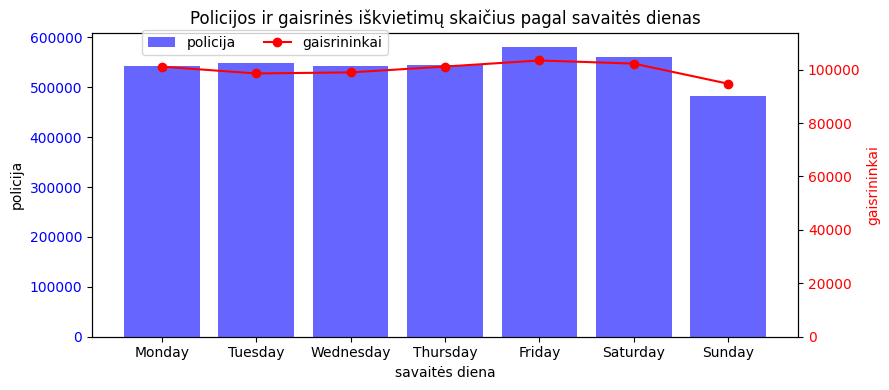

In [68]:
fig, ax1 = plt.subplots(figsize=(9, 4))

ax1.bar(df_data1['weekday'], df_data1['lastChangeDate'], color='blue', alpha=0.6, label='policija')
ax1.set_xlabel('savaitės diena')
ax1.set_ylabel('policija')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_data2['weekday'], df_data2['pagd_padalinys'], color='red', marker='o', label='gaisrininkai')
ax2.set_ylim(0, max(df_data2['pagd_padalinys']) * 1.1)
ax2.set_ylabel('gaisrininkai', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.legend(loc='upper center', bbox_to_anchor=(0.3, 0.93), ncol=2)
plt.title('Policijos ir gaisrinės iškvietimų skaičius pagal savaitės dienas')
plt.tight_layout()
plt.show()

In [69]:
df_data3=df_iskvietimai.groupby('menulis')['lastChangeDate'].count().reset_index()

df_data4=df_ivykis.groupby('menulis')['pagd_padalinys'].count().reset_index()

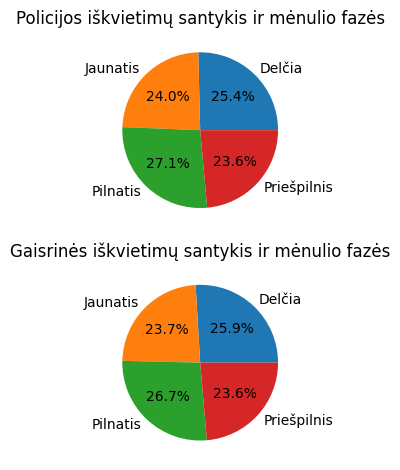

In [72]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.pie(df_data3['lastChangeDate'], labels=df_data3['menulis'], autopct='%1.1f%%')
ax1.set_title('Policijos iškvietimų santykis ir mėnulio fazės')
ax2.pie(df_data4['pagd_padalinys'], labels=df_data4['menulis'], autopct='%1.1f%%')
ax2.set_title('Gaisrinės iškvietimų santykis ir mėnulio fazės')
plt.tight_layout()
plt.show()